In [1]:
import sys
print(sys.version)

3.9.12 (main, Jun  1 2022, 11:38:51) 
[GCC 7.5.0]


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models

print("TensorFlow version:", tf.__version__)
tf.keras.backend.set_floatx('float64')

TensorFlow version: 2.8.2


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import os
import csv
import random

import cv2
import imutils
import glob
# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [4]:
#Określenie ścieżek do plików
folder = '../../Dane/Baza_zdjec_zlaczone_1/'
nazwa_CSV = 'nowe.csv'
folder_2 = '../../Dane/Baza_zdjec_moje/'
przed = 'Przed/'
zlaczone = 'Zlaczone/'
slesh = '/'
png = '.png'

In [5]:
def release_list(a):
    
    del a[:]
    del a

In [6]:
#Wczytanie pliku CSV do tablicy images

with open(folder+nazwa_CSV,"r") as csvfile:
    lines = csvfile.readlines()
csvfile.close()

new = []

for i in lines:
    new.append(i.split(" "))

    
value = []
for i in new[0]:
    value.append(int(i))    
    
print(len(value))

4600


In [7]:
#Wczytanie zdjęć do tablicy images
images = []
size = len(value)

for i in range(size):
    im = Image.open(folder+str(i)+png)
    arr_im = np.array(im) 
    arr_im = arr_im / 255.0
    images.append(arr_im) 
print(len(images))

4600


In [8]:
#Inicjalizacja tablic
rand_list = []
rand_list = np.zeros((len(images)), dtype=np.uint8)

x_test = []
y_test = []

x_train = []
y_train = []


#Okreslanie wielkosci zbiorów
eighty = int(len(images)*20/100)
twenty = len(images) - eighty

#Losowanie zbioru testowego
for i in range(eighty):
    
    #Pierwsze losowanie wartości
    rand = random.randint(0,len(images)-1)
    
    #Sprawdzenie czy wylosowana wartość się powtarza
    while (rand_list[rand] == 1) :
        #Jeżeli tak to ponownie losuje
        rand = random.randint(0,len(images)-1)
    
    #Zapisanie zdjecia i wartości do nowej tablicy
    x_test.append(images[rand])
    y_test.append(value[rand])
    rand_list[rand] = 1

#Losowanie zbioru uczącego
for j in range(twenty):
    
    #Pierwsze losowanie wartości
    rand = random.randint(0,len(images)-1)
    
    #Sprawdzenie czy wylosowana wartość się powtarza
    while (rand_list[rand] == 1) :
        #Jeżeli tak to ponownie losuje
        rand = random.randint(0,len(images)-1)
        
    #Zapisanie zdjecia i wartości do nowej tablicy
    x_train.append(images[rand])
    y_train.append(value[rand])
    rand_list[rand] = 1
    
    
release_list(images)
release_list(value)

In [9]:
#Sprawdzenie poprawności losowania
val_1 = sum(y_test) / 1800
print("%.2f" % val_1 + '%') 


val_2 = sum(y_train) / 1800
print("%.2f" % val_2 + '%') 

0.20%
0.80%


In [10]:
x_train = np.array(x_train)
x_test = np.array(x_test)

y_train = np.array(y_train)
y_test = np.array(y_test)

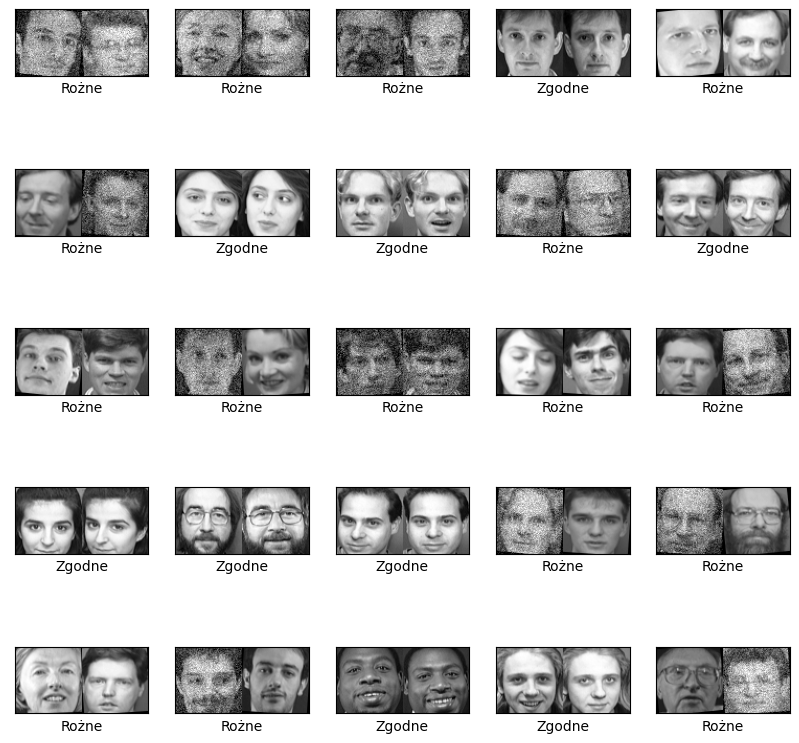

In [11]:
class_names = ["Rożne", "Zgodne"]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap = 'gray')
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [15]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 128, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 62, 126, 32)       320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 29, 61, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 28, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 21504)            

In [17]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(np.array(x_train), y_train, epochs=10, 
                    validation_data=(np.array(x_test), y_test))

Epoch 1/10
115/115 [==============================] - 40s 340ms/step - loss: 0.4150 - accuracy: 0.7935 - val_loss: 0.0974 - val_accuracy: 0.9609
Epoch 2/10
115/115 [==============================] - 40s 347ms/step - loss: 0.0442 - accuracy: 0.9870 - val_loss: 0.0171 - val_accuracy: 0.9957
Epoch 3/10
115/115 [==============================] - 39s 335ms/step - loss: 0.0282 - accuracy: 0.9927 - val_loss: 0.0430 - val_accuracy: 0.9924
Epoch 4/10
115/115 [==============================] - 38s 334ms/step - loss: 0.0270 - accuracy: 0.9946 - val_loss: 0.0282 - val_accuracy: 0.9946
Epoch 5/10
115/115 [==============================] - 38s 334ms/step - loss: 0.0202 - accuracy: 0.9954 - val_loss: 0.0292 - val_accuracy: 0.9935
Epoch 6/10
115/115 [==============================] - 39s 336ms/step - loss: 0.0153 - accuracy: 0.9976 - val_loss: 0.0133 - val_accuracy: 0.9978
Epoch 7/10
115/115 [==============================] - 38s 334ms/step - loss: 0.0170 - accuracy: 0.9959 - val_loss: 0.0136 - val_ac

29/29 - 3s - loss: 0.0215 - accuracy: 0.9978 - 3s/epoch - 96ms/step


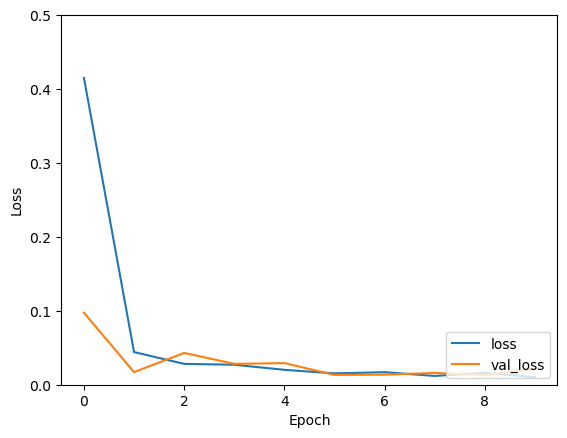

In [20]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 0.5])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

29/29 - 3s - loss: 0.0215 - accuracy: 0.9978 - 3s/epoch - 97ms/step


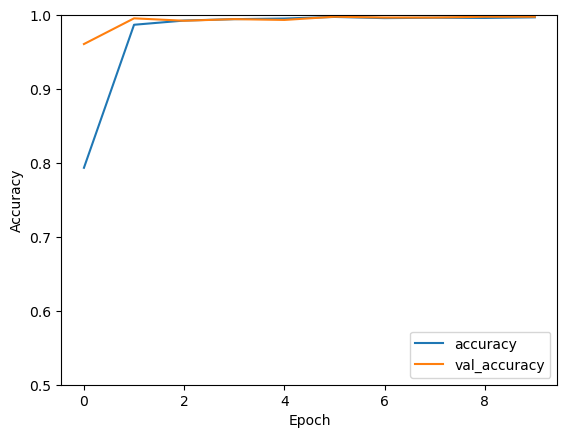

In [19]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

In [21]:
print(test_acc)

0.9978260869565218


In [22]:
model.evaluate(x_test,  y_test, verbose=2)

29/29 - 3s - loss: 0.0215 - accuracy: 0.9978 - 3s/epoch - 94ms/step


[0.021489610912217558, 0.9978260869565218]

In [23]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [24]:
arr = probability_model(x_test[:30])

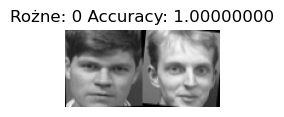

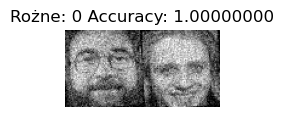

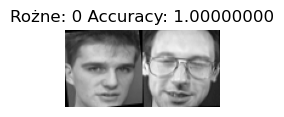

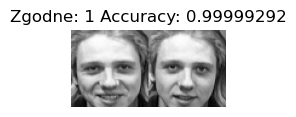

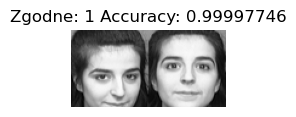

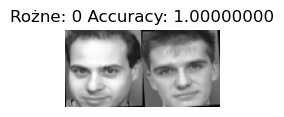

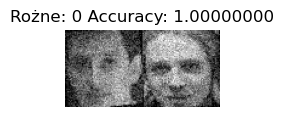

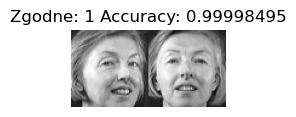

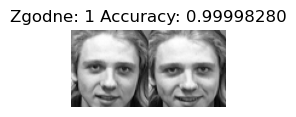

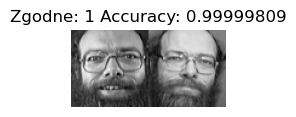

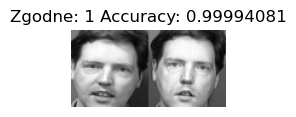

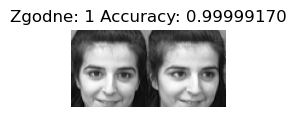

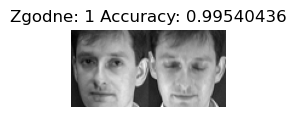

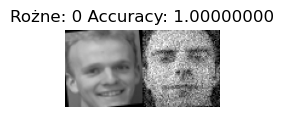

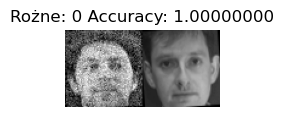

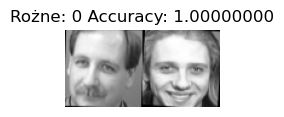

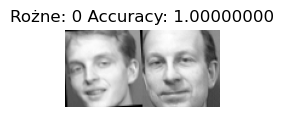

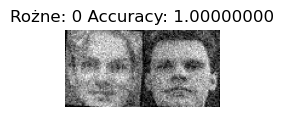

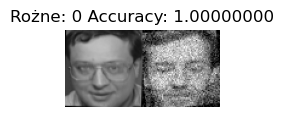

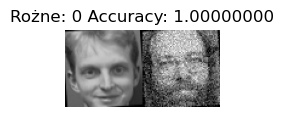

In [25]:
class_names = ["Rożne", "Zgodne"]

for x in range(20):
    
    if arr[x][0] > arr[x][1] :
        similar = 0
    else :
        similar = 1
     
    sample_image = np.array(x_test[x])
    plt.figure(figsize=(2,4))
    plt.axis('off')
    plt.title(class_names[similar]+': {} Accuracy: {:.8f}'.format(similar,arr[x][similar]))
    plt.imshow(sample_image, cmap = 'gray')

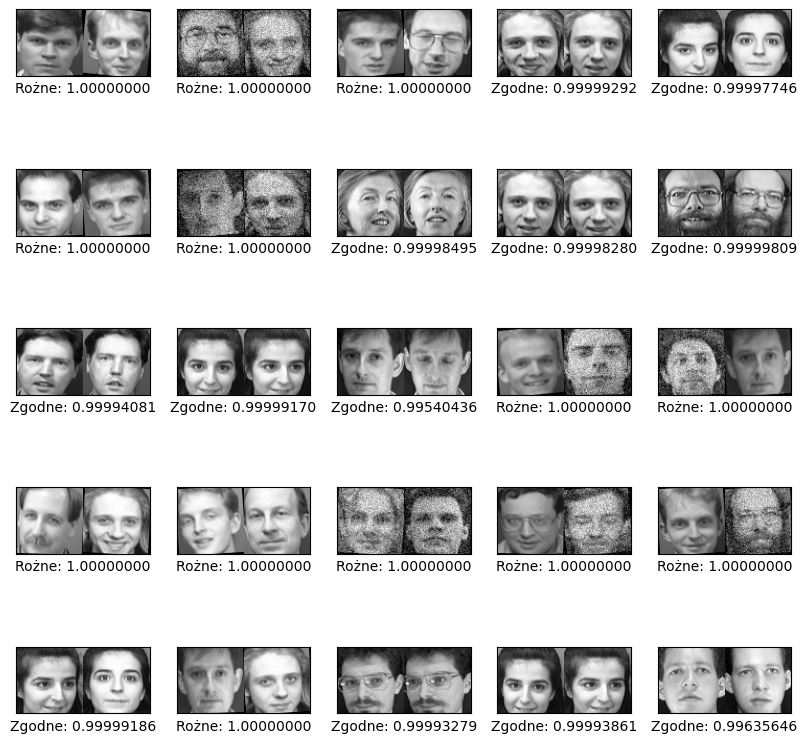

In [26]:
class_names = ["Rożne", "Zgodne"]

plt.figure(figsize=(10,10))
for i in range(25):
    
    if arr[i][0] > arr[i][1] :
        similar = 0
    else :
        similar = 1
    
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i],cmap = 'gray')
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[similar]+': {:.8f}'.format(arr[i][similar]))
plt.show()

In [27]:
arr_2 = probability_model(x_test)

In [38]:
ok = 0
wrong = 0
err = 0

arr_3 = []

for x in range(len(arr_2)):
    
    maks = 0
    for i in range(10): 
        
        if arr_2[x][i] > arr_2[x][maks]:
              maks = i
                
    if maks == 0 :
        arr_3.append(0)
        
        if maks == y_test[x] :
            ok = ok + 1          
        else:
            wrong = wrong + 1
            
            
    if maks == 1 :
        arr_3.append(1)
        if maks == y_test[x] :
            ok = ok + 1        
        else:
            wrong = wrong + 1       
    
    
    if maks > 2 :
        err = err + 1
        print(x)
        
       
    
print(ok) 
print(wrong) 
print(err) 
     

918
2
0


In [29]:
#Wczytanie moich zdjęć


In [30]:
moje = []
for i in range(6):
    im = Image.open(folder_2+zlaczone+str(i)+png)
    arr_moje = np.array(im)
    arr_moje = arr_moje / 255.0
    moje.append(arr_moje) 
print(len(moje))

moje = np.array(moje)

6


In [31]:
arr_4 = probability_model(moje)

In [32]:
print(arr_4)

tf.Tensor(
[[0.001 0.999 0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    1.    0.    0.    0.    0.    0.    0.    0.    0.   ]], shape=(6, 10), dtype=float64)


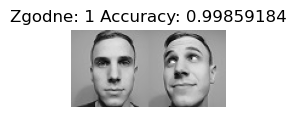

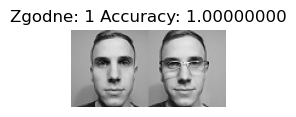

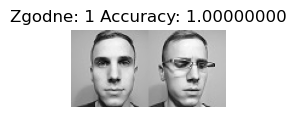

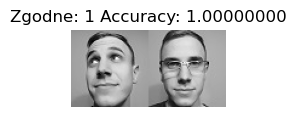

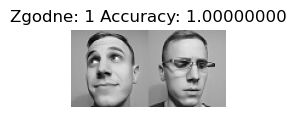

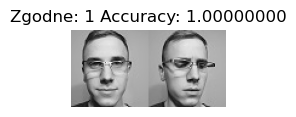

In [33]:
class_names = ["Rożne", "Zgodne"]

for x in range(len(arr_4)):
    
    if arr_4[x][0] > arr_4[x][1] :
        similar = 0
    else :
        similar = 1
     
    sample_image = np.array(moje[x])
    plt.figure(figsize=(2,4))
    plt.axis('off')
    plt.title(class_names[similar]+': {} Accuracy: {:.8f}'.format(similar,arr_4[x][similar]))
    plt.imshow(sample_image, cmap = 'gray')

In [53]:
names = [['Tn','Nn'],['Np', 'Tp']]
names = np.reshape(names,(2,2))
print(names)

tf.math.confusion_matrix(y_test,arr_3)

[['Tn' 'Nn']
 ['Np' 'Tp']]


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[553,   2],
       [  0, 365]], dtype=int32)>

[['Tn' 'Nn']
 ['Np' 'Tp']]


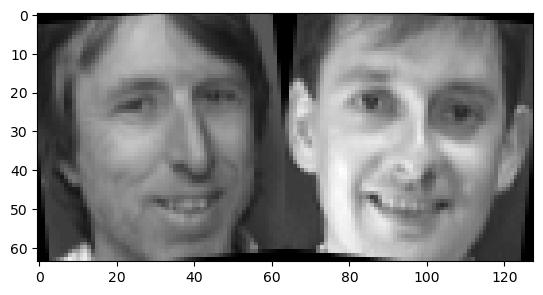

In [27]:
plt.imshow(x_train[1], cmap = 'gray')

In [26]:
#Sprawdza wielkość pliku
print(os.stat(folder).st_size)

118784


In [29]:
size = sys.getsizeof(x_train[1])

one_pix = size/(128*64)

print(one_pix)

8.015625


In [34]:
50000*sys.getsizeof(x_train[1])

3283200000

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 0],
       [3, 1]], dtype=int32)>